# DATA PREPARATION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#define some custom plotting functions for EDA
def histKdeSBY(df1, df2, colname, bins=50, labels=[0,1]):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    sns.histplot(df1[colname], bins=bins, label = labels[0], color='green', kde=True, ax=axes[0])
    axes[0].legend()

    sns.histplot(df2[colname], bins=bins, label = labels[1], color='red', kde=True, ax=axes[1])
    axes[1].legend()

    fig.tight_layout()
    plt.show()
    return

def histKdeT(df1, df2, colname, bins=50, labels=[0,1]):
    plt.subplots(figsize=(10, 6))
    sns.histplot(df1[colname], bins=bins, label = labels[0], color='green', kde=True, stat='density')
    sns.histplot(df2[colname], bins=bins, label = labels[1], color='red', kde=True, stat='density')
    plt.legend()

    fig.tight_layout()
    plt.show()
    return


def boxplot_Cust(df1, df2, colname, ax):
    merged_df = pd.DataFrame({0: df1[colname], 1: df2[colname]})
    sns.boxplot(x="variable", y="value", data=pd.melt(merged_df), palette = ['green', 'red'], ax=ax)
    ax.set_title('Box Plot for ' + colname)

    
    
def histKdeT2(df1, df2, colname, bins=50, labels=[0,1]):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    sns.histplot(df1[colname], bins=bins, label = labels[0], color='green', kde=True, stat='density', ax=axes[0])
    sns.histplot(df2[colname], bins=bins, label = labels[1], color='red', kde=True, stat='density', ax=axes[0])
    axes[0].set_title('Histogram - Density Plot for ' + colname)
    axes[0].set_xlabel('Value')
    axes[0].legend()
    
    boxplot_Cust(df1, df2, colname, axes[1])

    fig.tight_layout()
    plt.show()
    return


def histKdeT3(df1, df2, colname, bins=50, labels=[0,1]):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    sns.displot(df1, x=colname, kind='kde', color='green', fill=True, ax=axes[0])
    sns.displot(df2, x=colname, kind='kde', color='red', fill=True, ax=axes[0])
    axes[0].set_title('Histogram - Density Plot for ' + colname)
    axes[0].set_xlabel('Value')
    axes[0].legend()
    
    boxplot_Cust(df1, df2, colname, axes[1])

    fig.tight_layout()
    plt.show()
    return

In [2]:
df = pd.read_csv('SAMHDA data.csv')

C:\Users\david\AppData\Local\Temp\ipykernel_17744\3808056673.py:1: DtypeWarning: Columns (2726) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SAMHDA data.csv')


In [3]:
#examine error on cc
df.iloc[:, 2726]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32888    NaN
32889    NaN
32890    NaN
32891    NaN
32892    NaN
Name: GQTYPE2, Length: 32893, dtype: object

In [4]:
#The column GQTYPE2 represents interview information on type of group quarter where C means college dorm and O means Other
#missing value indicates it is NOT a type of group quarter.
print(df.iloc[:, 2726].value_counts())

#considering most of the data is missing this column is dropped
df=df.drop(['GQTYPE2'], axis=1)

C    127
O     31
Name: GQTYPE2, dtype: int64


In [5]:
df.head()

,QUESTID2,FILEDATE,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,GOVTPROG,INCOME,POVERTY3,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWTQ1Q4_C,VESTRQ1Q4_C,VEREP
0,10000182,10/25/2021,1,99,99,16,9999,99,1,30,...,2,4,3.0,3,3,2,2,16186.579070,40048,2
1,10001831,10/25/2021,1,99,99,8,9999,99,1,24,...,2,3,3.0,2,2,2,2,16809.072850,40022,2
2,10002722,10/25/2021,2,99,99,991,9991,91,91,91,...,2,2,3.0,1,1,2,2,1379.866862,40011,1
3,10002897,10/25/2021,2,99,99,991,9991,91,91,91,...,2,4,3.0,1,1,2,2,422.776340,40007,1
4,10004677,10/25/2021,2,4,4,991,9991,91,91,91,...,2,4,3.0,2,2,2,2,609.829709,40031,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32893 entries, 0 to 32892
Columns: 2889 entries, QUESTID2 to VEREP
dtypes: float64(429), int64(2459), object(1)
memory usage: 725.0+ MB


In [8]:
df.describe()

,QUESTID2,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,CG30EST,...,GOVTPROG,INCOME,POVERTY3,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWTQ1Q4_C,VESTRQ1Q4_C,VEREP
count,3.289300e+04,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,...,32893.000000,32893.000000,32768.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000,32893.000000
mean,2.649578e+07,1.555377,83.735141,83.757061,560.897638,9890.192412,93.358526,51.850150,82.936704,92.566899,...,1.839966,2.902684,2.536469,1.646004,1.735232,1.986228,1.986046,8418.568538,40025.402882,1.410422
std,9.583202e+06,0.496932,34.927911,34.891725,484.033219,905.910716,10.474010,43.773093,23.765419,3.543308,...,0.366643,1.134239,0.734603,0.598197,0.745474,0.116545,0.117303,13203.001412,14.411373,0.491918
min,1.000018e+07,1.000000,1.000000,1.000000,1.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.889186,40001.000000,1.000000
25%,1.818380e+07,1.000000,99.000000,99.000000,16.000000,9991.000000,91.000000,4.000000,91.000000,91.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1322.797934,40013.000000,1.000000
50%,2.641664e+07,2.000000,99.000000,99.000000,991.000000,9991.000000,91.000000,91.000000,91.000000,91.000000,...,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3939.994144,40025.000000,1.000000
75%,3.484307e+07,2.000000,99.000000,99.000000,991.000000,9999.000000,99.000000,91.000000,93.000000,93.000000,...,2.000000,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,9931.880191,40038.000000,2.000000
max,4.307541e+07,2.000000,99.000000,99.000000,997.000000,9999.000000,99.000000,91.000000,98.000000,99.000000,...,2.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,223960.324100,40050.000000,2.000000


In [6]:
print(df['FILEDATE'].value_counts())
print(df['QUESTID2'].nunique())
#date is all the same so we can drop date, question ID which is just a unique identifer, so we drop both coulumns

10/25/2021    32893
Name: FILEDATE, dtype: int64
32893


In [7]:
df = df.drop(['FILEDATE', 'QUESTID2'], axis=1)

In [8]:
df.head()

,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,CG30EST,CIG30AV,...,GOVTPROG,INCOME,POVERTY3,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWTQ1Q4_C,VESTRQ1Q4_C,VEREP
0,1,99,99,16,9999,99,1,30,99,5,...,2,4,3.0,3,3,2,2,16186.579070,40048,2
1,1,99,99,8,9999,99,1,24,99,6,...,2,3,3.0,2,2,2,2,16809.072850,40022,2
2,2,99,99,991,9991,91,91,91,91,91,...,2,2,3.0,1,1,2,2,1379.866862,40011,1
3,2,99,99,991,9991,91,91,91,91,91,...,2,4,3.0,1,1,2,2,422.776340,40007,1
4,2,4,4,991,9991,91,91,91,91,91,...,2,4,3.0,2,2,2,2,609.829709,40031,1


In [9]:
#drop  all columns related to methamphetamine except methamphetamine use itself
methcols = []
for cols in list(df.columns):
    if cols[0:3] == 'MET':
        methcols.append(cols)
methcols.append('MEFQFLG')
df = df.drop(methcols[1:], axis=1)
#note that 48 columns are dropped so far

In [13]:
#METHAMEVR is the column representing the answer to whether a user has ever used METH
df['METHAMEVR'].value_counts()

2     31456
1      1402
94       31
97        3
85        1
Name: METHAMEVR, dtype: int64

In [10]:
#only keep rows where the answer is 1 (Yes) or 2(No)
mask1 = df['METHAMEVR'] == 1 
mask2 = df['METHAMEVR'] == 2
df = df.loc[mask1 | mask2, :]

In [11]:
#confirm dropped rows
print(df['METHAMEVR'].value_counts(normalize=True))
print(df['METHAMEVR'].value_counts())

2    0.957332
1    0.042668
Name: METHAMEVR, dtype: float64
2    31456
1     1402
Name: METHAMEVR, dtype: int64


In [16]:
df.head()

,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,CG30EST,CIG30AV,...,GOVTPROG,INCOME,POVERTY3,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWTQ1Q4_C,VESTRQ1Q4_C,VEREP
0,1,99,99,16,9999,99,1,30,99,5,...,2,4,3.0,3,3,2,2,16186.579070,40048,2
1,1,99,99,8,9999,99,1,24,99,6,...,2,3,3.0,2,2,2,2,16809.072850,40022,2
2,2,99,99,991,9991,91,91,91,91,91,...,2,2,3.0,1,1,2,2,1379.866862,40011,1
3,2,99,99,991,9991,91,91,91,91,91,...,2,4,3.0,1,1,2,2,422.776340,40007,1
4,2,4,4,991,9991,91,91,91,91,91,...,2,4,3.0,2,2,2,2,609.829709,40031,1


In [12]:
#REVIEW TOP 6 OTHER MAIN SUBSTANCE: TOBACCO, ALCOHOL, MARIJUANA, COCAINE, CRACK, HEROIN
#drop users if thier answer to "ever used ?" question is not yes or no
top6 = ['CIG', 'ALC', 'MJE', 'COC', 'CRK', 'HER']
Agecols = []
for cols in list(df.columns):
    if (cols[-3:] == 'AGE') & (cols[:3] in top6):
        Agecols.append(cols)
Agecols.append('METHAMEVR')
print(Agecols)

['CIGAGE', 'COCAGE', 'CRKAGE', 'HERAGE', 'METHAMEVR']


In [13]:
df_age = df.loc[:, Agecols]
df_age.loc[df_age['METHAMEVR'] == 2, 'METHAMEVR'] = 0
df_age.head()

df_age = df_age[df_age['HERAGE'] < 81]
df_age.head()

# for cols in Agecols:
#     mask = (df_age[cols] < 81)
    
#     df_age

,CIGAGE,COCAGE,CRKAGE,HERAGE,METHAMEVR
63,25,19,991,22,0
122,15,25,991,25,0
182,14,17,17,18,0
236,14,16,16,17,1
248,16,18,18,22,1


In [21]:
#we also want to focus on adult substance abuse so we remove all records of patients less than 18yrs of age
df['AGE2'].value_counts()

15    7413
14    3261
16    3107
17    2983
13    2444
12    2222
11    2067
2     1066
3     1015
10     975
4      933
5      927
1      927
7      906
9      888
8      883
6      841
Name: AGE2, dtype: int64

In [14]:
#response that are 1-6 represents ages 12 - 17 years, above that is 18 so we drop 1-6
mask3 = df['AGE2'] > 6
df = df.loc[mask3, :]
df['AGE2'].value_counts()

15    7413
14    3261
16    3107
17    2983
13    2444
12    2222
11    2067
10     975
7      906
9      888
8      883
Name: AGE2, dtype: int64

In [15]:
#new size of df is now 27149 as opposed to the initial 32893
print(len(df))
df.head()

27149


,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,CG30EST,CIG30AV,...,GOVTPROG,INCOME,POVERTY3,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWTQ1Q4_C,VESTRQ1Q4_C,VEREP
0,1,99,99,16,9999,99,1,30,99,5,...,2,4,3.0,3,3,2,2,16186.579070,40048,2
1,1,99,99,8,9999,99,1,24,99,6,...,2,3,3.0,2,2,2,2,16809.072850,40022,2
2,2,99,99,991,9991,91,91,91,91,91,...,2,2,3.0,1,1,2,2,1379.866862,40011,1
3,2,99,99,991,9991,91,91,91,91,91,...,2,4,3.0,1,1,2,2,422.776340,40007,1
5,2,99,99,991,9991,91,91,91,91,91,...,2,2,3.0,2,2,2,2,2529.748991,40041,2


In [16]:
#modify crack users info, replace 91 with 2 since they both mean the same thing
df['CRKEVER'][df['CRKEVER'] == 91] = 2

In [17]:
#REVIEW TOP 6 OTHER MAIN SUBSTANCE: TOBACCO, ALCOHOL, MARIJUANA, COCAINE, CRACK, HEROIN
#drop users if thier answer to "ever used ?" question is not yes or no
top6 = ['CIG', 'ALC', 'MJE', 'COC', 'CRK', 'HER']
EVERcols = []
for cols in list(df.columns):
    if (cols[-4:] == 'EVER') & (cols[:3] in top6):
        EVERcols.append(cols)
EVERcols
for cols in EVERcols:
    mask1 = df[cols] == 1 
    mask2 = df[cols] == 2
    mask3 = df[cols] == 91
    df = df.loc[mask1 | mask2 | mask3, :]

In [18]:
#test cocain ever to see if it worked
df['CRKEVER'].value_counts()

2    26311
1      809
Name: CRKEVER, dtype: int64

In [19]:
#new table length
len(df)

27120

Remove irrelevant / descriptive information about drug abuse for each substance to further reduce dimensionality

In [20]:
#TOBACCO
#CIGARETTES
CIGkeep = ['CIGEVER', 'CIGTRY', 'CIGREC', 'CIGAGE']
#SMOKELESS TOBACCO
SMKkeep = ['SMKLSSEVR', 'SMKLSSTRY', 'SMKLSSREC']
#CIGAR
CIGARkeep = ['CIGAREVR', 'CIGARTRY', 'CIGARREC']
#PIPE
PIPEkeep = ['PIPEVER']

In [21]:
#ALCOHOL
ALCkeep =['ALCEVER', 'ALCTRY', 'ALCREC']
#MARIJUANA
MJkeep = ['MJEVER', 'MJAGE', 'MJREC']
#COCAIN
COCkeep = ['COCEVER', 'COCAGE', 'COCREC']
#CRACK
CRKkeep = ['CRKEVER', 'CRKAGE', 'CRAKREC']
#HEROIN
HERkeep = ['HEREVER', 'HERAGE', 'HERREC']

In [22]:
#HALLUCINOGENS
HALkeep = ['HALLUCEVR', 'HALLUCAGE', 'HALLUCREC']
#INHALANTS
INHkeep = ['INHALEVER', 'INHALAGE', 'INHALREC']

In [23]:
#PAIN RELIEVERS
PAINkeep = ['PNRANYLIF', 'PNRANYREC', 'PNRNMLIF', 'PNRNMREC', 'PNRNMAGE',
            'PNRRSHIGH', 'PNRRSSLEP', 'PNRRSHOOK']
#TRANQULIZERS
TRANQkeep =['TRQANYLIF', 'TRQANYREC', 'TRQNMLIF', 'TRQNMREC', 'TRQNMAGE', 'TRQRSHIGH', 'TRQRSSLEP', 'TRQRSHOOK']

#STIMULANTS
STIMkeep = ['STMANYLIF', 'STMANYREC', 'STMNMLIF', 'STMNMREC', 'STMNMAGE', 'STMRSCONC', 'STMRSHIGH', 'STMRSHOOK']

#SEDATIVES
SEDkeep = ['SEDANYLIF', 'SEDANYREC', 'SEDNMLIF', 'SEDNMREC', 'SEDNMAGE', 'SEDRSHIGH', 'SEDRSSLEP', 'SEDRSHOOK']

In [24]:
#OTHER DRUGS AND SELF ADMINISTERED
OTHERkeep = ['COLDMEDS', 'COLDREC', 'GHB', 'GHBREC', 'COCNEEDL', 'HERSMOKE', 'HERSNIFF', 'HERNEEDL']
#RISKS
RISkeep = ['RSKCIGPKD', 'RSKMRJMON', 'RSKLSDTRY', 'RSKHERTRY', 'RSKCOCMON', 'RSKBNGDLY', 'RSKYFQDGR', 'RSKYFQTES']
#AVAILABILITY
AVALkeep = ['DIFGETMRJ', 'DIFGETLSD', 'DIFGETCOC', 'DIFGETCRK', 'DIFGETHER']
#DEPENDENCE AND ABUSE
DEPkeep = ['CIGIRTBL', 'ALCWD2SX', 'MRJNDMOR', 'COCNDMOR', 'HERNDMOR', 'HALUNDMOR', 'INHLNDMOR', 'PNRLNDMOR',
          'TRQLNDMOR', 'STIMNDMOR', 'SEDVNDMOR', 'DEPENDHAL', 'DEPENDINH', 'DEPENDPNR', 'DEPENDTRQ', 'DEPENDSTM',
          'DEPENDSED', 'ABUPOSHAL', 'ABUPOSINH', 'ABUPOSPNR', 'ABUPOSTRQ', 'ABUPOSSTM', 'ABUPOSSED']
#SPECIAL TOPICS
SPECkeep = ['BOOKED', 'NOBOOKY2']

#DRUG TREATMENT
DRGTkeep = ['TXEVRRCVD', 'TXYRRECVD', 'TXYRMHCAD']

#MENTAL HEALTH
MENTkeep = ['AUINPYR', 'AUOPTYR', 'DSTNRV30', 'DSTHOP30', 'DSTRST30', 'DSTCHR30']

#SOCIAL ENVIRONMENT
SOCkeep = ['SNYSELL', 'SNYSTOLE', 'SNRLGIMP', 'SNRLDCSN']

#YOUTH EXPERIENCES
YTHkeep = ['YEATNDYR', 'YESCHFLT', 'YESTSCIG', 'YESTSMJ']

#ADULT DEPRESSION
ADEPkeep = ['ADDPREV', 'ADDSCEV', 'ADWRDLOT', 'ADWRSTHK']

#LANGUAGE
LANG = ['LANGVER']

#DEMOGRAPHICS
DEMkeep = ['AGE2', 'NOMARR2', 'SERVICE', 'MILSTAT', 'COMBATPY', 'HEALTH', 'MOVSINPYR2', 'SEXATRACT', 'SEXIDENT']

#EDUCATION
EDUkeep = ['EDUSCHLGO', 'MILTFAMLY', 'COLLENRLFT', 'WRKSTATWK2', 'WRKHADJOB']

#HEALTH INSURANCE
HIkeep = ['MEDICARE', 'CAIDCHIP', 'CHAMPUS', 'PRVHLTIN']

#INCOME 
INCkeep = ['CELLWRKNG', 'GOVTPROG', 'INCOME']

#GEOGRAPHIC
GEOkeep = ['PDEN10', 'COUTYP4', 'MAIIN102', 'AIIND102']

#TARGET PRED
TAR = ['METHAMEVR']

In [25]:
#FINAL COLUMNS FOR ANALYSIS
analysisCols = (CIGkeep+CIGARkeep+SMKkeep+PIPEkeep+ALCkeep+COCkeep+MJkeep+CRKkeep+HERkeep+HALkeep+INHkeep+PAINkeep+TRANQkeep+
                STIMkeep+SEDkeep+OTHERkeep+RISkeep+AVALkeep+DEPkeep+SPECkeep+DRGTkeep+MENTkeep+SOCkeep+YTHkeep+ADEPkeep+LANG+
                DEMkeep+EDUkeep+HIkeep+INCkeep+GEOkeep+TAR)

print(len(analysisCols))

158


In [26]:
#subset to only 182 columns for analysis
df = df.loc[:, analysisCols]
df.head()

,CIGEVER,CIGTRY,CIGREC,CIGAGE,CIGAREVR,CIGARTRY,CIGARREC,SMKLSSEVR,SMKLSSTRY,SMKLSSREC,...,CHAMPUS,PRVHLTIN,CELLWRKNG,GOVTPROG,INCOME,PDEN10,COUTYP4,MAIIN102,AIIND102,METHAMEVR
0,1,16,1,18,1,21,4,1,12,1,...,2,1,1,2,4,3,3,2,2,2
1,1,8,1,18,2,991,91,1,16,4,...,2,1,1,2,3,2,2,2,2,2
2,2,991,91,991,2,991,91,2,991,91,...,2,1,1,2,2,1,1,2,2,2
3,2,991,91,991,2,991,91,2,991,91,...,2,1,1,2,4,1,1,2,2,2
5,2,991,91,991,2,991,91,2,991,91,...,2,1,1,2,2,2,2,2,2,2


In [27]:
df_backup = df.copy()

In [49]:
# df = df_backup.copy()

In [50]:
df.describe()

,CIGEVER,CIGTRY,CIGREC,CIGAGE,CIGAREVR,CIGARTRY,CIGARREC,SMKLSSEVR,SMKLSSTRY,SMKLSSREC,...,CHAMPUS,PRVHLTIN,CELLWRKNG,GOVTPROG,INCOME,PDEN10,COUTYP4,MAIIN102,AIIND102,METHAMEVR
count,27120.000000,27120.000000,27120.000000,27120.000000,27120.000000,27120.000000,27120.000000,27120.000000,27120.000000,27120.000000,...,27120.000000,27120.000000,27120.000000,27120.000000,27120.00000,27120.000000,27120.000000,27120.000000,27120.000000,27120.000000
mean,1.478540,485.387869,45.069617,739.865966,1.701586,672.656711,61.843326,1.858444,838.297198,77.088422,...,7.502950,7.294764,7.149078,1.847124,2.86722,1.643142,1.731268,1.986615,1.986394,1.948599
std,0.499548,487.030720,44.015657,428.095176,1.834218,455.519442,41.343387,1.303462,353.805997,32.063218,...,22.383135,23.241859,23.571497,0.359875,1.13924,0.597274,0.743111,0.114919,0.115851,0.220819
min,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,16.000000,4.000000,27.000000,1.000000,23.000000,4.000000,2.000000,991.000000,91.000000,...,2.000000,1.000000,1.000000,2.000000,2.00000,1.000000,1.000000,2.000000,2.000000,2.000000
50%,1.000000,24.000000,4.000000,991.000000,2.000000,991.000000,91.000000,2.000000,991.000000,91.000000,...,2.000000,1.000000,1.000000,2.000000,3.00000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,991.000000,91.000000,999.000000,2.000000,991.000000,91.000000,2.000000,991.000000,91.000000,...,2.000000,2.000000,1.000000,2.000000,4.00000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,997.000000,91.000000,999.000000,94.000000,998.000000,98.000000,94.000000,998.000000,98.000000,...,98.000000,98.000000,98.000000,2.000000,4.00000,3.000000,3.000000,2.000000,2.000000,2.000000


In [51]:
#EXTRACT all columns relating to age of first use or first try
AGEorTRYcols = []
for cols in list(df.columns):
    if (cols[-3:] == 'AGE') | (cols[-3:] == 'TRY'):
        if (cols != 'RSKLSDTRY') & (cols != 'RSKHERTRY'):
            AGEorTRYcols.append(cols)
AGEorTRYcols

['CIGTRY',
 'CIGAGE',
 'CIGARTRY',
 'SMKLSSTRY',
 'ALCTRY',
 'COCAGE',
 'MJAGE',
 'CRKAGE',
 'HERAGE',
 'HALLUCAGE',
 'INHALAGE',
 'PNRNMAGE',
 'TRQNMAGE',
 'STMNMAGE',
 'SEDNMAGE']

In [52]:
#collapse age to under-18 or over-18
for cols in AGEorTRYcols:
    mask1 = ((df[cols] < 81) & (df[cols] >= 18))
    mask2 = ((df[cols] < 18) & (df[cols] > 0))
    
    df.loc[mask1, cols] = '18 or older'
    df.loc[mask2, cols] = 'less than 18'

In [53]:
#COMPRESS RESPONDENTS AGE INTO BINS
mask1 = (df['AGE2'] > 0) & (df['AGE2'] <= 6)
mask2 = (df['AGE2'] >= 7) & (df['AGE2'] <= 12)
mask3 = (df['AGE2'] >= 13) & (df['AGE2'] <= 14)
mask4 = (df['AGE2'] == 15) 
mask5 = (df['AGE2'] == 16)
mask6 = (df['AGE2'] == 17)

df.loc[mask1, 'AGE2'] = '12-17'
df.loc[mask2, 'AGE2'] = '18-25'
df.loc[mask3, 'AGE2'] = '26-34'
df.loc[mask4, 'AGE2'] = '35-49'
df.loc[mask5, 'AGE2'] = '50-64'
df.loc[mask6, 'AGE2'] = '65+'

In [54]:
df.loc[:, 'AGE2'].value_counts()

18-25    7928
35-49    7407
26-34    5700
50-64    3105
65+      2980
Name: AGE2, dtype: int64

In [56]:
df.head()

,CIGEVER,CIGTRY,CIGREC,CIGAGE,CIGAREVR,CIGARTRY,CIGARREC,SMKLSSEVR,SMKLSSTRY,SMKLSSREC,...,CHAMPUS,PRVHLTIN,CELLWRKNG,GOVTPROG,INCOME,PDEN10,COUTYP4,MAIIN102,AIIND102,METHAMEVR
0,1,less than 18,1,18 or older,1,18 or older,4,1,less than 18,1,...,2,1,1,2,4,3,3,2,2,2
1,1,less than 18,1,18 or older,2,991,91,1,less than 18,4,...,2,1,1,2,3,2,2,2,2,2
2,2,991,91,991,2,991,91,2,991,91,...,2,1,1,2,2,1,1,2,2,2
3,2,991,91,991,2,991,91,2,991,91,...,2,1,1,2,4,1,1,2,2,2
5,2,991,91,991,2,991,91,2,991,91,...,2,1,1,2,2,2,2,2,2,2


In [60]:
for cols in df.columns:
    mask1 = ((df[cols] == 91) | (df[cols] == 991) | (df[cols] == 9991)) #0
    mask2 = ((df[cols] == 97) | (df[cols] == 997) | (df[cols] == 9997)) #miss
    mask3 = ((df[cols] == 93) | (df[cols] == 993) | (df[cols] == 9993)) #0
    mask4 = ((df[cols] == 81) | (df[cols] == 981) | (df[cols] == 9981)) #0
    mask5 = ((df[cols] == 83) | (df[cols] == 983) | (df[cols] == 9983)) #0
    mask6 = ((df[cols] == 99) | (df[cols] == 999) | (df[cols] == 9999)) #leg skip
    mask7 = ((df[cols] == 89) | (df[cols] == 989) | (df[cols] == 9989)) #leg skip
    mask8 = ((df[cols] == 94) | (df[cols] == 994) | (df[cols] == 9994)) #dont know
    mask9 = ((df[cols] == 98) | (df[cols] == 998) | (df[cols] == 9998)) #miss
    mask10 = ((df[cols] == 85) | (df[cols] == 985) | (df[cols] == 9985)) #miss
    
    df.loc[mask1, cols] = 0
    df.loc[mask2, cols] = np.nan
    df.loc[mask3, cols] = 0
    df.loc[mask4, cols] = 0
    df.loc[mask5, cols] = 0
    df.loc[mask6, cols] = 'skip'
    df.loc[mask7, cols] = 'skip'
    df.loc[mask8, cols] = 'unknown'
    df.loc[mask9, cols] = np.nan
    df.loc[mask10, cols] = np.nan

In [61]:
len(df.columns[df.isnull().any()])

129

In [47]:
df.describe()

,CIGEVER,CIGTRY,CIGREC,CIGAGE,CIGAREVR,CIGARTRY,CIGARREC,SMKLSSEVR,SMKLSSTRY,SMKLSSREC,...,CHAMPUS,PRVHLTIN,CELLWRKNG,GOVTPROG,INCOME,PDEN10,COUTYP4,MAIIN102,AIIND102,METHAMEVR
count,27120.0,27085,27120.0,27107,27120.0,27068,27110.0,27120.0,27093,27115.0,...,25603.0,25568.0,25419.0,27120.0,27120.0,27120.0,27120.0,27120.0,27120.0,27120.0
unique,2.0,4,10.0,5,3.0,4,10.0,3.0,4,9.0,...,3.0,3.0,3.0,2.0,4.0,3.0,3.0,2.0,2.0,2.0
top,1.0,0,0.0,0,2.0,0,0.0,2.0,0,0.0,...,2.0,1.0,1.0,2.0,4.0,2.0,1.0,2.0,2.0,2.0
freq,14142.0,12978,12978.0,12978,18097.0,18097,18097.0,22816.0,22816,22816.0,...,24497.0,17298.0,24673.0,22974.0,11778.0,13992.0,12111.0,26757.0,26751.0,25726.0


In [48]:
df.describe(include='O')

,CIGEVER,CIGTRY,CIGREC,CIGAGE,CIGAREVR,CIGARTRY,CIGARREC,SMKLSSEVR,SMKLSSTRY,SMKLSSREC,...,CHAMPUS,PRVHLTIN,CELLWRKNG,GOVTPROG,INCOME,PDEN10,COUTYP4,MAIIN102,AIIND102,METHAMEVR
count,27120.0,27085,27120.0,27107,27120.0,27068,27110.0,27120.0,27093,27115.0,...,25603.0,25568.0,25419.0,27120.0,27120.0,27120.0,27120.0,27120.0,27120.0,27120.0
unique,2.0,4,10.0,5,3.0,4,10.0,3.0,4,9.0,...,3.0,3.0,3.0,2.0,4.0,3.0,3.0,2.0,2.0,2.0
top,1.0,0,0.0,0,2.0,0,0.0,2.0,0,0.0,...,2.0,1.0,1.0,2.0,4.0,2.0,1.0,2.0,2.0,2.0
freq,14142.0,12978,12978.0,12978,18097.0,18097,18097.0,22816.0,22816,22816.0,...,24497.0,17298.0,24673.0,22974.0,11778.0,13992.0,12111.0,26757.0,26751.0,25726.0


In [62]:
df.nunique()

CIGEVER       2
CIGTRY        4
CIGREC       10
CIGAGE        5
CIGAREVR      3
             ..
PDEN10        3
COUTYP4       3
MAIIN102      2
AIIND102      2
METHAMEVR     2
Length: 158, dtype: int64

In [63]:
df.columns[df.nunique() >= 5]

Index(['CIGREC', 'CIGAGE', 'CIGARREC', 'SMKLSSREC', 'ALCREC', 'COCREC',
       'MJREC', 'CRAKREC', 'HERREC', 'HALLUCREC', 'INHALREC', 'PNRNMLIF',
       'PNRNMREC', 'PNRRSHIGH', 'PNRRSHOOK', 'TRQNMLIF', 'TRQNMREC',
       'STMNMLIF', 'STMNMREC', 'SEDNMLIF', 'SEDNMREC', 'SEDRSSLEP', 'COLDREC',
       'GHBREC', 'COCNEEDL', 'HERSMOKE', 'HERSNIFF', 'RSKCIGPKD', 'RSKMRJMON',
       'RSKLSDTRY', 'RSKHERTRY', 'RSKCOCMON', 'RSKBNGDLY', 'RSKYFQDGR',
       'RSKYFQTES', 'DIFGETMRJ', 'DIFGETLSD', 'DIFGETCOC', 'DIFGETCRK',
       'DIFGETHER', 'CIGIRTBL', 'ALCWD2SX', 'NOBOOKY2', 'TXYRRECVD',
       'DSTNRV30', 'DSTHOP30', 'DSTRST30', 'DSTCHR30', 'SNYSELL', 'SNYSTOLE',
       'SNRLGIMP', 'SNRLDCSN', 'AGE2', 'HEALTH', 'MOVSINPYR2', 'SEXATRACT',
       'WRKSTATWK2', 'WRKHADJOB'],
      dtype='object')

In [64]:
RECcols = []
for cols in list(df.columns):
    if (cols[-3:] == 'REC'):
        RECcols.append(cols)
RECcols

['CIGREC',
 'CIGARREC',
 'SMKLSSREC',
 'ALCREC',
 'COCREC',
 'MJREC',
 'CRAKREC',
 'HERREC',
 'HALLUCREC',
 'INHALREC',
 'PNRANYREC',
 'PNRNMREC',
 'TRQANYREC',
 'TRQNMREC',
 'STMANYREC',
 'STMNMREC',
 'SEDANYREC',
 'SEDNMREC',
 'COLDREC',
 'GHBREC']

In [65]:
df.loc[:, RECcols].nunique()

CIGREC       10
CIGARREC     10
SMKLSSREC     9
ALCREC        7
COCREC        8
MJREC         6
CRAKREC       6
HERREC        7
HALLUCREC     8
INHALREC      6
PNRANYREC     4
PNRNMREC      6
TRQANYREC     4
TRQNMREC      5
STMANYREC     4
STMNMREC      6
SEDANYREC     4
SEDNMREC      5
COLDREC       5
GHBREC        5
dtype: int64

In [66]:
others = [8, 9, 14, 19, 29]
for cols in RECcols:
    mask1 = df[cols].isin(others)
    mask2 = (df[cols] == 11)
    mask3 = (df[cols] == 12)
    
    df.loc[mask1, cols] = 'others'
    df.loc[mask2, cols] = 1
    df.loc[mask3, cols] = 2

In [67]:
df['ALCREC'].value_counts()

1.0       15473
2.0        4080
0.0        4070
3.0        3331
others      166
Name: ALCREC, dtype: int64

In [68]:
df.nunique().sort_values(ascending=False)[:15]

WRKSTATWK2    9
CIGIRTBL      7
SEXATRACT     7
TXYRRECVD     7
SNYSTOLE      6
DIFGETHER     6
DIFGETCRK     6
DIFGETCOC     6
NOBOOKY2      6
DIFGETLSD     6
DIFGETMRJ     6
DSTNRV30      6
DSTHOP30      6
DSTCHR30      6
SNYSELL       6
dtype: int64

In [69]:
df['CIGIRTBL'].value_counts()

0.0        23124
1.0          994
2.0          969
3.0          760
4.0          730
5.0          456
unknown        7
Name: CIGIRTBL, dtype: int64

In [70]:
df.columns[df.nunique() == 4]

Index(['CIGTRY', 'CIGARTRY', 'SMKLSSTRY', 'ALCTRY', 'COCAGE', 'MJAGE',
       'CRKAGE', 'HALLUCAGE', 'INHALAGE', 'PNRANYLIF', 'PNRANYREC',
       'PNRRSSLEP', 'TRQANYLIF', 'TRQANYREC', 'TRQRSHIGH', 'TRQRSSLEP',
       'TRQRSHOOK', 'STMANYLIF', 'STMANYREC', 'STMRSHIGH', 'SEDANYLIF',
       'SEDANYREC', 'SEDNMAGE', 'SEDRSHIGH', 'SEDRSHOOK', 'HERNEEDL',
       'MRJNDMOR', 'HERNDMOR', 'HALUNDMOR', 'PNRLNDMOR', 'TRQLNDMOR', 'BOOKED',
       'TXEVRRCVD', 'TXYRMHCAD', 'ADDSCEV', 'ADWRDLOT', 'ADWRSTHK', 'NOMARR2',
       'MILSTAT', 'COMBATPY', 'SEXIDENT', 'EDUSCHLGO', 'INCOME'],
      dtype='object')

In [71]:
for cols in df.loc[:, df.nunique() == 2].columns:
    df.loc[df[cols] == 2, cols] = 0
    df.loc[df[cols] == 1, cols] = 1
    df.loc[df[cols] == 2.0, cols] = 0
    df.loc[df[cols] == 1.0, cols] = 1
    df.loc[df[cols] == 0.0, cols] = 0
    df.loc[df[cols] == '2.0', cols] = 0
    df.loc[df[cols] == '1.0', cols] = 1
    df.loc[df[cols] == '2', cols] = 0
    df.loc[df[cols] == '1', cols] = 1
    df.loc[df[cols] == '0.0', cols] = 0
df.loc[:, df.nunique() == 2].head()

,CIGEVER,ALCEVER,COCEVER,MJEVER,CRKEVER,HEREVER,HALLUCEVR,INHALEVER,DEPENDHAL,DEPENDINH,...,ABUPOSPNR,ABUPOSTRQ,ABUPOSSTM,ABUPOSSED,LANGVER,SERVICE,GOVTPROG,MAIIN102,AIIND102,METHAMEVR
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [72]:
df.head()

,CIGEVER,CIGTRY,CIGREC,CIGAGE,CIGAREVR,CIGARTRY,CIGARREC,SMKLSSEVR,SMKLSSTRY,SMKLSSREC,...,CHAMPUS,PRVHLTIN,CELLWRKNG,GOVTPROG,INCOME,PDEN10,COUTYP4,MAIIN102,AIIND102,METHAMEVR
0,1,less than 18,1.0,18 or older,1.0,18 or older,4.0,1.0,less than 18,1.0,...,2.0,1.0,1.0,0,4.0,3.0,3.0,0,0,0
1,1,less than 18,1.0,18 or older,2.0,0,0.0,1.0,less than 18,4.0,...,2.0,1.0,1.0,0,3.0,2.0,2.0,0,0,0
2,0,0,0.0,0,2.0,0,0.0,2.0,0,0.0,...,2.0,1.0,1.0,0,2.0,1.0,1.0,0,0,0
3,0,0,0.0,0,2.0,0,0.0,2.0,0,0.0,...,2.0,1.0,1.0,0,4.0,1.0,1.0,0,0,0
5,0,0,0.0,0,2.0,0,0.0,2.0,0,0.0,...,2.0,1.0,1.0,0,2.0,2.0,2.0,0,0,0


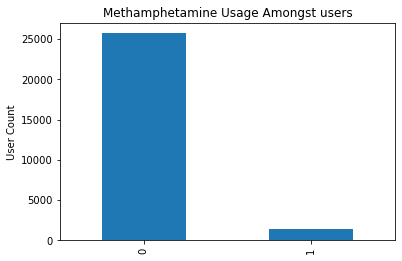

In [73]:
df['METHAMEVR'].value_counts().plot(kind='bar')
plt.title('Methamphetamine Usage Amongst users')
plt.ylabel('User Count')
plt.show()

In [74]:
df_backup = df.copy()

In [62]:
df = df_backup.copy()

In [75]:
df = df.applymap(str)

In [76]:
for cols in df.columns:
    mask = (df[cols] == 'nan')
    
    df.loc[mask, cols] = np.nan

In [77]:
#check number of columns with missing data
len(df.columns[df.isnull().any()])

129

In [66]:
# #drop rows with missing data
# df = df.dropna()
# len(df.columns[df.isnull().any()])

In [78]:
len(df)

27120

In [79]:
df['METHAMEVR'].value_counts()

0    25726
1     1394
Name: METHAMEVR, dtype: int64

for cols in df.loc[:, df.nunique() == 2].columns:
    df.loc[df[cols] == '2.0', cols] = 0
    df.loc[df[cols] == '1.0', cols] = 1
    df.loc[df[cols] == '2', cols] = 0
    df.loc[df[cols] == '1', cols] = 1
    df.loc[df[cols] == '0.0', cols] = 1
df.loc[:, df.nunique() == 2].head()

In [81]:
df.to_csv('NSDUH PROCESSED2.csv')

In [69]:
# #save results as excel file to the path C:\\Users\\davidnnamdi
# writer = pd.ExcelWriter(input('save results as: ') + '.xlsx', engine='xlsxwriter')
# df.to_excel(writer, sheet_name='Sheet1')
# writer.save()